In [1]:
import pandas as pd
import patsy 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
import itertools
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.formula.api import ols
from numpy import linalg
from pandas import *
#from sklearn.linear_model import Ridge
%matplotlib inline


/Users/shani16/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df= pd.read_csv('/Users/shani16/ds/data/luther.csv', index_col=0)

In [3]:
# #Remove rows where domestic gross is blank
# df= df[np.isfinite(df['domestic_gross'])]
df = df.dropna(how='any')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bc52490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c30e450>]], dtype=object)

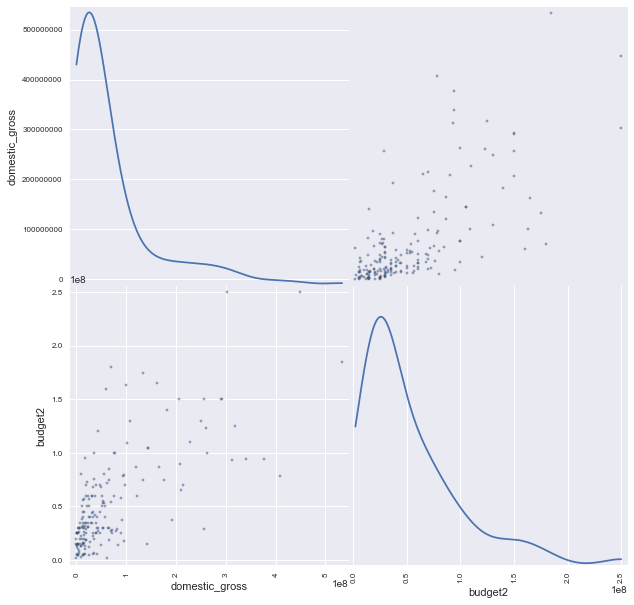

In [4]:
pd.scatter_matrix(df[[ "domestic_gross", "budget2"]].dropna(), alpha=0.5, figsize=(10, 10), diagonal='kde')


In [172]:
# def explore(var):
#     t = test2.pivot_table( columns=var, values='Domestic Gross', aggfunc=np.mean)
#     g=test2.reset_index()
#     return t.plot(x=var, y='Domestic Gross')
#     plt.figure(figsize=(40,20))
    

In [173]:
#Split data into test and train
train=df

In [174]:
train=train.rename(columns = {'Sci-Fi':'scifi'})
train=train.rename(columns = {'NC-17':'NC17'})
train=train.rename(columns = {'PG-13':'PG13'})

In [175]:
from statsmodels.formula.api import ols
genre = ols(formula="domestic_gross ~ Action + Adventure + Animation + Comedy + Crime + Documentary + Drama + Family + Fantasy + Foreign +  Horror + IMAX + Music +  Romance +   Sports + Thriller + War + Western ", data=train).fit()
genre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     5.911
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           2.12e-09
Time:                        14:30:08   Log-Likelihood:                -3639.4
No. Observations:                 186   AIC:                             7309.
Df Residuals:                     171   BIC:                             7357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    4.823e+07   1.65e+07      2.915      0.004      1.56e+07  8.09e+07
Action       8.166e+07   2.37e+07      3.450      0.001      3.49e+07  1.28e+08
Adventure    3.981e+07   4.87e+07      0.817      0.415     -5.64e+07  1.36e+08
Animation     5.46e+07   3.64e+07      1.501      0.135     -1.72e+07  1.26e+08
Comedy      -1.232e+07   2.58e+07     -0.477      0.634     -6.33e+07  3.87e+07
Crime        1.375e+07   3.64e+07      0.378      0.706     -5.81e+07  8.56e+07
Documentary -2.877e-08   1.53e-08     -1.880      0.062      -5.9e-08  1.44e-09
Drama       -2.002e+07   2.05e+07     -0.976      0.330     -6.05e+07  2.05e+07
Family       2.352e+07   2.91e+07      0.808      0.420     -3.39e+07   8.1e+07
Fantasy      1.616e+08   2.69e+07      6.006      0.000      1.08e+08  2.15e+08
Foreign     -2.261e-08   1.87e-08     -1.209      0.228     -5.95e-08  1.43e-08
Horror      -9.913e+06   3.43e+07     -0.289      0.773     -7.75e+07  5.77e+07
IMAX        -2.225e-09   6.77e-09     -0.329      0.743     -1.56e-08  1.11e-08
Music        6.196e-09   4.24e-09      1.462      0.145     -2.17e-09  1.46e-08
Romance      1.306e+07   3.12e+07      0.419      0.676     -4.85e+07  7.47e+07
Sports       1.399e+08   5.85e+07      2.391      0.018      2.44e+07  2.55e+08
Thriller    -7.209e+06   2.83e+07     -0.255      0.799      -6.3e+07  4.86e+07
War         -7.584e+06   3.26e+07     -0.233      0.816     -7.19e+07  5.67e+07
Western     -9.209e+06    4.3e+07     -0.214      0.831     -9.41e+07  7.57e+07
==============================================================================
Omnibus:                       77.231   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.530
Skew:                           1.536   Prob(JB):                     6.28e-78
Kurtosis:                       9.036   Cond. No.                     1.70e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [176]:
rating = ols(formula = "domestic_gross ~ G + NC17 + PG13  + Unknown + Unrated " , data=train).fit()
rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.796
Date:                Thu, 28 Jan 2016   Prob (F-statistic):              0.132
Time:                        14:30:12   Log-Likelihood:                -3672.5
No. Observations:                 186   AIC:                             7355.
Df Residuals:                     181   BIC:                             7371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.496e+07   9.26e+06      5.933      0.000      3.67e+07  7.32e+07
G           1.137e+07   4.22e+07      0.269      0.788      -7.2e+07  9.47e+07
NC17       -5.243e+07   9.26e+07     -0.566      0.572     -2.35e+08   1.3e+08
PG13        3.415e+07   1.39e+07      2.465      0.015      6.81e+06  6.15e+07
Unknown    -5.461e+07   9.26e+07     -0.590      0.556     -2.37e+08  1.28e+08
Unrated             0          0        nan        nan             0         0
==============================================================================
Omnibus:                       96.377   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.229
Skew:                           2.171   Prob(JB):                     4.85e-75
Kurtosis:                       8.031   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [152]:
# month = ols(formula = "domestic_gross ~ " , data=train).fit()
# month.summary()

In [177]:
result1 = ols(formula="domestic_gross ~ budget2", data=train).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     176.9
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.00e-28
Time:                        14:30:15   Log-Likelihood:                -3613.4
No. Observations:                 186   AIC:                             7231.
Df Residuals:                     184   BIC:                             7237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.075e+06   7.37e+06     -0.553      0.581     -1.86e+07  1.05e+07
budget2        1.4206      0.107     13.302      0.000         1.210     1.631
==============================================================================
Omnibus:                       73.706   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.243
Skew:                           1.557   Prob(JB):                     5.65e-59
Kurtosis:                       7.992   Cond. No.                     1.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
result2 = ols(formula="domestic_gross ~ budget2 + rtime", data=train).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.55e-31
Time:                        14:30:18   Log-Likelihood:                -3604.0
No. Observations:                 186   AIC:                             7214.
Df Residuals:                     183   BIC:                             7224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.138e+08   2.58e+07     -4.414      0.000     -1.65e+08 -6.29e+07
budget2        1.2599      0.108     11.657      0.000         1.047     1.473
rtime       1.006e+06   2.27e+05      4.423      0.000      5.57e+05  1.45e+06
==============================================================================
Omnibus:                       52.464   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.580
Skew:                           1.151   Prob(JB):                     1.22e-33
Kurtosis:                       6.776   Cond. No.                     3.82e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
result3a = ols(formula="domestic_gross ~ budget2 + Movies + rtime + bestsell_author", data=train).fit()
result3a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     66.82
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.24e-34
Time:                        14:43:56   Log-Likelihood:                -3591.7
No. Observations:                 186   AIC:                             7193.
Df Residuals:                     181   BIC:                             7210.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept               -9.407e+07   2.57e+07     -3.655      0.000     -1.45e+08 -4.33e+07
bestsell_author[T.True]  7.016e+07   1.39e+07      5.037      0.000      4.27e+07  9.76e+07
budget2                     1.1750      0.114     10.310      0.000         0.950     1.400
Movies                  -4817.7888   2.21e+04     -0.218      0.828     -4.85e+04  3.89e+04
rtime                    8.168e+05   2.18e+05      3.750      0.000      3.87e+05  1.25e+06
==============================================================================
Omnibus:                       75.296   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.810
Skew:                           1.460   Prob(JB):                     1.11e-81
Kurtosis:                       9.291   Cond. No.                     4.07e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
result4 = sm.ols(formula="domestic_gross ~ budget2 + rtime + bestsell_author + comic_book", data=train).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     69.77
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.20e-35
Time:                        14:43:25   Log-Likelihood:                -3589.3
No. Observations:                 186   AIC:                             7189.
Df Residuals:                     181   BIC:                             7205.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                -9.14e+07   2.43e+07     -3.762      0.000     -1.39e+08 -4.35e+07
bestsell_author[T.True]  7.614e+07    1.4e+07      5.434      0.000      4.85e+07  1.04e+08
comic_book[T.True]       4.533e+07   2.07e+07      2.194      0.030      4.56e+06  8.61e+07
budget2                     1.0861      0.108     10.033      0.000         0.873     1.300
rtime                    7.905e+05   2.15e+05      3.680      0.000      3.67e+05  1.21e+06
==============================================================================
Omnibus:                       67.706   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.884
Skew:                           1.308   Prob(JB):                     2.55e-69
Kurtosis:                       8.823   Cond. No.                     3.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
result5 = ols(formula="domestic_gross ~ budget2 + rtime + bestsell_author + comic_book +  Holiday + Summer + Sports + Foreign + Fantasy + Animation + Action", data=train).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     32.95
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           2.96e-35
Time:                        14:30:20   Log-Likelihood:                -3577.6
No. Observations:                 186   AIC:                             7177.
Df Residuals:                     175   BIC:                             7213.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                -9.44e+07    2.5e+07     -3.778      0.000     -1.44e+08 -4.51e+07
bestsell_author[T.True]  6.522e+07    1.4e+07      4.643      0.000      3.75e+07   9.3e+07
comic_book[T.True]       4.938e+07   2.18e+07      2.270      0.024      6.45e+06  9.23e+07
budget2                     0.8519      0.122      6.965      0.000         0.611     1.093
rtime                    7.687e+05    2.2e+05      3.501      0.001      3.35e+05   1.2e+06
Holiday                  2.548e+07   1.11e+07      2.304      0.022      3.66e+06  4.73e+07
Summer                   1.869e+07   1.14e+07      1.638      0.103     -3.83e+06  4.12e+07
Sports                    1.13e+08   4.05e+07      2.790      0.006      3.31e+07  1.93e+08
Foreign                 -9.077e-08    1.8e-08     -5.029      0.000     -1.26e-07 -5.51e-08
Fantasy                  4.382e+07    1.9e+07      2.302      0.023      6.24e+06  8.14e+07
Animation                3.752e+07   2.51e+07      1.496      0.136      -1.2e+07   8.7e+07
Action                   3.001e+07   1.47e+07      2.039      0.043      9.62e+05   5.9e+07
==============================================================================
Omnibus:                       67.912   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.915
Skew:                           1.274   Prob(JB):                     1.04e-76
Kurtosis:                       9.218   Cond. No.                     1.04e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.26e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [182]:
import statsmodels.formula.api as sm
result6 = sm.ols(formula= "domestic_gross ~ budget2 + PG13+ rtime + bestsell_author + comic_book + Holiday + Sports+ Summer +  Fantasy + Animation + Action", data=train).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     30.65
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           3.58e-35
Time:                        14:30:46   Log-Likelihood:                -3575.9
No. Observations:                 186   AIC:                             7176.
Df Residuals:                     174   BIC:                             7214.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept               -1.029e+08   2.53e+07     -4.074      0.000     -1.53e+08  -5.3e+07
bestsell_author[T.True]  6.568e+07    1.4e+07      4.705      0.000      3.81e+07  9.32e+07
comic_book[T.True]       5.011e+07   2.16e+07      2.318      0.022      7.45e+06  9.28e+07
budget2                     0.8546      0.122      7.032      0.000         0.615     1.094
PG13                     1.591e+07   8.78e+06      1.813      0.071     -1.41e+06  3.32e+07
rtime                    7.963e+05   2.19e+05      3.641      0.000      3.65e+05  1.23e+06
Holiday                  2.335e+07   1.11e+07      2.113      0.036      1.54e+06  4.52e+07
Sports                   1.045e+08   4.05e+07      2.580      0.011      2.46e+07  1.85e+08
Summer                   1.562e+07   1.15e+07      1.363      0.175        -7e+06  3.82e+07
Fantasy                  3.934e+07   1.91e+07      2.062      0.041      1.69e+06   7.7e+07
Animation                4.387e+07   2.52e+07      1.743      0.083     -5.79e+06  9.35e+07
Action                   2.594e+07   1.48e+07      1.754      0.081     -3.25e+06  5.51e+07
==============================================================================
Omnibus:                       62.220   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.962
Skew:                           1.158   Prob(JB):                     4.93e-68
Kurtosis:                       8.885   Cond. No.                     6.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
df.columns

Index([u'Fall', u'Holiday', u'Spring', u'Summer', u'Winter', u'Rank',
       u'distributor', u'Movies', u'dis_bo', u'Tickets', u'Share', u'book',
       u'movie', u'author', u'bestsell_author', u'genre', u'release_date',
       u'rating', u'domestic_gross', u'comic_book', u'rtime', u'budget2',
       u'genre1', u'Action', u'Adventure', u'Animation', u'Comedy', u'Crime',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Foreign',
       u'Historical', u'Horror', u'IMAX', u'Music', u'Period', u'Romance',
       u'Romantic', u'Sci-Fi', u'Sports', u'Thriller', u'Unknown', u'War',
       u'Western', u'G', u'NC-17', u'PG', u'PG-13', u'R', u'Unknown.1',
       u'Unrated', u'release_month', u'release_year', u'release_day',
       u'season'],
      dtype='object')

In [183]:
final_mod1=train[['budget2' , 'rtime' , 'bestsell_author' , 'comic_book' , 'Holiday' , 'Summer' , 'PG13', 'Sports' , 'Fantasy' , 'Animation' , 'Action']]#df = final_mod1/final_mod1.max().astype(np.float64)

In [186]:
df = final_mod1/final_mod1.max().astype(np.float64)
y= train[['domestic_gross']]
df1=pd.concat([y, df], axis=1)

In [188]:
import statsmodels.formula.api as sm
result6 = sm.ols(formula= "domestic_gross ~ budget2 + rtime + bestsell_author + comic_book + Holiday + Sports+ Summer +  Fantasy + Animation + Action", data=df1).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     32.95
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           2.96e-35
Time:                        14:31:29   Log-Likelihood:                -3577.6
No. Observations:                 186   AIC:                             7177.
Df Residuals:                     175   BIC:                             7213.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -9.44e+07    2.5e+07     -3.778      0.000     -1.44e+08 -4.51e+07
budget2           2.13e+08   3.06e+07      6.965      0.000      1.53e+08  2.73e+08
rtime            1.614e+08   4.61e+07      3.501      0.001      7.04e+07  2.52e+08
bestsell_author  6.522e+07    1.4e+07      4.643      0.000      3.75e+07   9.3e+07
comic_book       4.938e+07   2.18e+07      2.270      0.024      6.45e+06  9.23e+07
Holiday          2.548e+07   1.11e+07      2.304      0.022      3.66e+06  4.73e+07
Sports            1.13e+08   4.05e+07      2.790      0.006      3.31e+07  1.93e+08
Summer           1.869e+07   1.14e+07      1.638      0.103     -3.83e+06  4.12e+07
Fantasy          4.382e+07    1.9e+07      2.302      0.023      6.24e+06  8.14e+07
Animation        3.752e+07   2.51e+07      1.496      0.136      -1.2e+07   8.7e+07
Action           3.001e+07   1.47e+07      2.039      0.043      9.62e+05   5.9e+07
==============================================================================
Omnibus:                       67.912   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.915
Skew:                           1.274   Prob(JB):                     1.04e-76
Kurtosis:                       9.218   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

df1.head

In [189]:
df1 = df1.dropna(how='any')

In [198]:
import math
Y=df1.iloc[:,:1]
X=df1.iloc[:,1:]
X=df1[['budget2', 'rtime' , 'Holiday' , 'Summer'  , 'PG13', 'Fantasy' , 'Animation' , 'Action', "bestsell_author", "comic_book" ]]

#X['budget2']=[math.log(i) for i in df['budget2']]

linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     53.00
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           7.33e-48
Time:                        14:48:22   Log-Likelihood:                -3588.2
No. Observations:                 186   AIC:                             7196.
Df Residuals:                     176   BIC:                             7229.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
budget2           2.27e+08   3.21e+07      7.068      0.000      1.64e+08   2.9e+08
rtime           -1.234e+07   1.41e+07     -0.874      0.383     -4.02e+07  1.55e+07
Holiday          2.743e+07   1.17e+07      2.345      0.020      4.34e+06  5.05e+07
Summer           1.337e+07   1.21e+07      1.106      0.270     -1.05e+07  3.72e+07
PG13             1.187e+07   9.11e+06      1.302      0.195     -6.12e+06  2.99e+07
Fantasy          5.006e+07   1.99e+07      2.510      0.013      1.07e+07  8.94e+07
Animation        1.412e+07   2.56e+07      0.551      0.583     -3.65e+07  6.47e+07
Action            1.77e+07   1.56e+07      1.133      0.259     -1.31e+07  4.85e+07
bestsell_author  6.978e+07   1.47e+07      4.732      0.000      4.07e+07  9.89e+07
comic_book       6.071e+07   2.28e+07      2.665      0.008      1.57e+07  1.06e+08
==============================================================================
Omnibus:                       82.630   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.463
Skew:                           1.547   Prob(JB):                    4.72e-110
Kurtosis:                      10.443   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: shapes (186,10) and (1,) not aligned: 10 (dim 1) != 1 (dim 0)

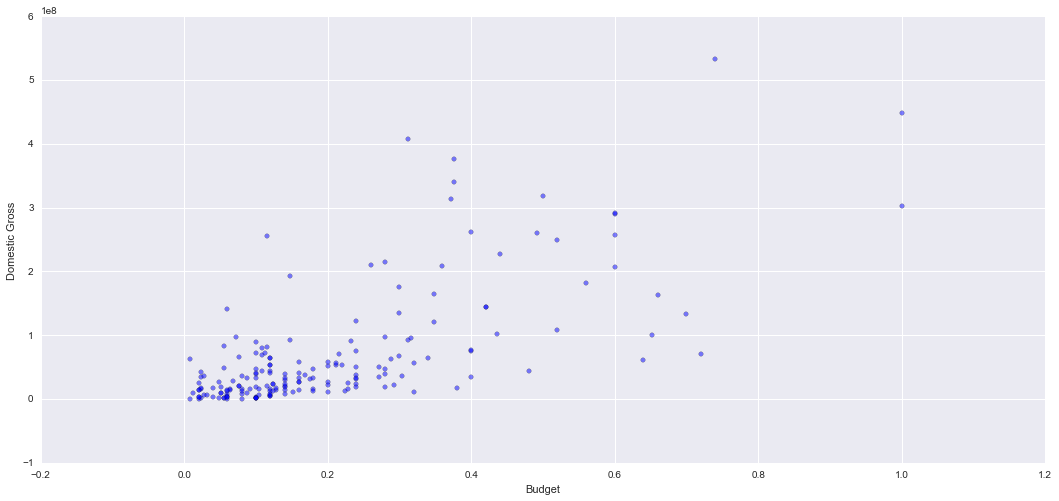

In [217]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,8))

plt.scatter(X.budget2, Y,  alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Domestic Gross')
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim([11, 20])
# plt.xlim([11, 20])
plt.plot(X.budget2, linmodel.predict(X), 'rs', alpha=0.5)

ax1 = fig.add_subplot(1,1,1)
#ax1.set_xscale('log')
# # ax1.set_xticks([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
import matplotlib
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2 = fig.add_subplot(1,1,1)
# ax2.set_yscale('log')
# # ax2.set_yticks([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [218]:
import statsmodels.api as sm
ig = sm.graphics.plot_partregress_grid(linmodel, fig=fig)
plt.show()

LinAlgError: Arrays cannot be empty

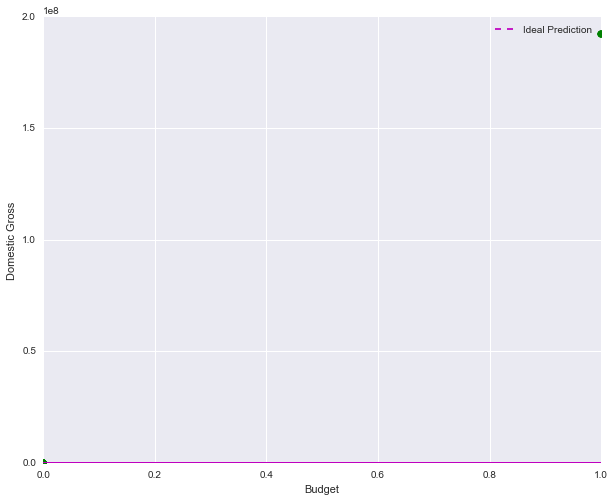

In [214]:
import random
#Sample for training
train_index = random.sample(df1.index, int(0.80*len(df1)))
#X_train = df1[['budget2' , 'rtime' , 'Holiday' , 'Summer' ,  'Fantasy' , 'Animation' , 'Action', "bestsell_author", "comic_book"]].ix[train_index]
X_train = df1[["bestsell_author"]].ix[train_index]

X_train["bestsell_author"] = [math.log(i) for i in X_train["bestsell_author"]]
Y_train = df1['domestic_gross'].ix[train_index]
Y_train = [math.log(i) for i in Y_train]

#fitting the model
linmodel = sm.OLS(Y_train,X_train).fit()

# #Test sample
X_test = df1[["bestsell_author"]].drop(train_index)
#X_test = df1[['budget2' , 'Holiday' , 'Summer' ,  'Fantasy' , 'Animation' ,  "bestsell_author", "comic_book"]].drop(train_index)

Y_test = df1["bestsell_author"].drop(train_index)
Y_test = [math.log(i) for i in Y_test]
X_test['budget2'] = [math.log(i) for i in X_test["bestsell_author"]]

# #plotting
plt.figure(figsize=(10,8))
plt.plot(Y_test, linmodel.predict(X_test), 'go')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross')
plt.plot(Y_test,Y_test,'m--', label='Ideal Prediction')
plt.legend()

mean sq error:  5.71841724097


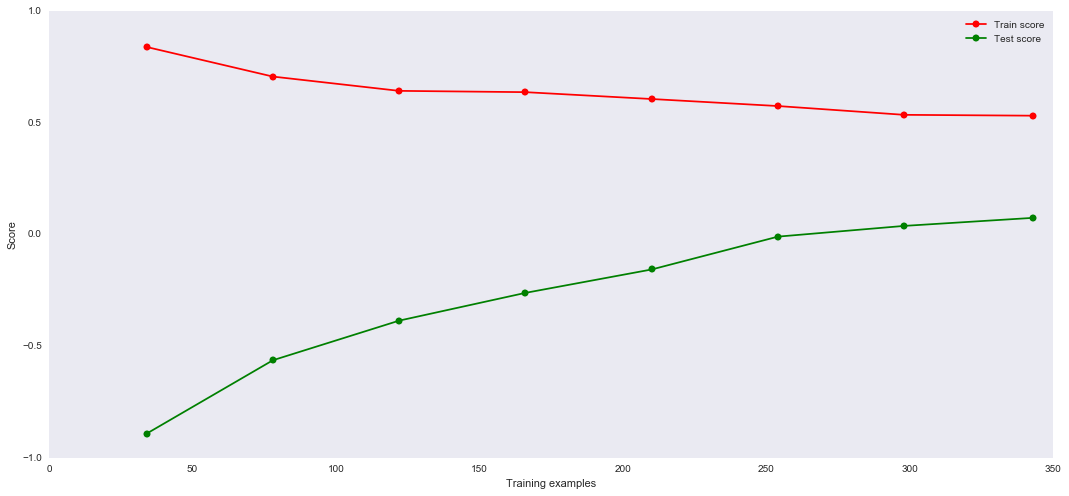

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

sk_linmodel = LinearRegression()
sk_linmodel.fit(X,Y)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=20,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 8,10)):
    """
    Generate a simple plot of the test and traning learning curve.
    """

    plt.figure(figsize=(18,8))
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

Y_pred_test = linmodel.predict(X_test)
plot_learning_curve(sk_linmodel,'Learning curve', X,Y)
print 'mean sq error: ', (metrics.mean_squared_error(Y_test,Y_pred_test))

AttributeError: 'LinearRegression' object has no attribute 'coefficients'

In [70]:
from scikits.learn import linear_model
clf = sk_linmodel.Ridge (alpha = .5)
clf.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
Ridge(alpha=0.5, fit_intercept=True)
clf.coef_



AttributeError: 'LinearRegression' object has no attribute 'Ridge'

In [69]:
import scikits.learn

In [ ]:
final_model = sm.ols(formula="domestic_gross ~   budget2 + rtime + bestsell_author + comic_book + Holiday + Summer + Sports +  Fantasy + Animation + Action", data=final_mod).fit()
final_model.summary()

In [ ]:
from scipy import stats
Z = stats.zscore(X, axis=0)
Y = stats.zscore(y)

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,20))
fig = sm.graphics.plot_partregress_grid(result6, fig=fig)

In [ ]:
x_pred = np.linspace(x1.min(), x1.max(), 50)

In [ ]:
y_hat = result6.predict(x)

In [ ]:
mean_x = x.T[1].mean()

In [ ]:
y1=y['domestic_gross'].tolist()

In [ ]:
x1